In [23]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import permutation
import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random

Вариант 2

In [53]:
a1 = 0.4
b1 = 0.15
alpha1 = np.pi / 6
x0_1 = 0
y0_1 = 0

a2 = 0.7
b2 = 0.5
alpha2 = 0
x0_2 = 0
y0_2 = 0

a3 = 1
b3 = 1
alpha3 = 0
x0_3 = 0
y0_3 = 0

In [54]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True)


In [55]:

def f(alpha, x0, a, t, y0, b):
    return (x0 + a * np.cos(t)) * np.cos(alpha) + (y0 + b * np.sin(t)) * np.sin(alpha)

def g(alpha, x0, a, t, y0, b):
    return -(x0 + a * np.cos(t)) * np.sin(alpha) + (y0 + b * np.sin(t)) * np.cos(alpha)

In [56]:
x1 = f(alpha1, x0_1, a1, t, y0_1, b1)
y1 = g(alpha1, x0_1, a1, t, y0_1, b1)

x2 = f(alpha2, x0_2, a2, t, y0_2, b2)
y2 = g(alpha2, x0_2, a2, t, y0_2, b2)

x3 = f(alpha3, x0_3, a3, t, y0_3, b3)
y3 = g(alpha3, x0_3, a3, t, y0_3, b3)

251

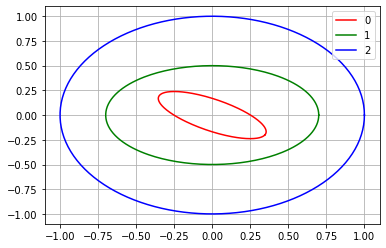

In [57]:
plt.plot(x1, y1, 'r', label=0)
plt.plot(x2, y2, 'g', label=1)
plt.plot(x3, y3, 'b', label=2)
plt.grid()
plt.legend()

In [107]:
def choiceN(x1, x2, x3,y1,y2,y3,n):
    x_ret = []
    y_ret = []
    for _ in range(n):
        idx = np.random.randint(1,4)
        idx2 = np.random.randint(0,251)
        if idx == 1:
            x_ret.append(x1[idx2])
            y_ret.append(y1[idx2])
        elif idx == 2:
            x_ret.append(x2[idx2])
            y_ret.append(y2[idx2])
        elif idx == 3:
            x_ret.append(x3[idx2])
            y_ret.append(y3[idx2])
    return x_ret, y_ret

        

In [113]:
first, second = choiceN(x1,x2,x3,y1,y2,y3,60)
df1 = pd.DataFrame({'x' : first, 'y' : second, 'class' : 0})
first, second = choiceN(x1,x2,x3,y1,y2,y3,100)
df2 = pd.DataFrame({'x' : first, 'y' : second, 'class' : 1})
first, second = choiceN(x1,x2,x3,y1,y2,y3,120)
df3 = pd.DataFrame({'x' : first, 'y' : second, 'class' : 2})

In [114]:
def Splitter(data):
    xTrain, xTest = train_test_split(data, test_size=3./10, shuffle=True, random_state=42)
    xValid, xTest = train_test_split(xTest, test_size=1./3, shuffle=True, random_state=42)
    return xTrain, xTest, xValid

In [115]:
train, test, valid = [], [], []

tmpTrain, tmpTest, tmpValid = Splitter(df1)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

tmpTrain, tmpTest, tmpValid = Splitter(df2)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

tmpTrain, tmpTest, tmpValid = Splitter(df3)
train.append(tmpTrain)
test.append(tmpTest)
valid.append(tmpValid)

train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)



In [143]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, [-1]]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, [-1]]
X_valid, y_valid = valid.iloc[:, :-1], valid.iloc[:, [-1]]



In [146]:
y_train = pd.get_dummies(y_train, columns=['class'])
y_test = pd.get_dummies(y_test,  columns=['class'])
y_valid = pd.get_dummies(y_valid,  columns=['class'])

In [147]:
y_valid

,class_0,class_1,class_2
8,1,0,0
17,1,0,0
50,1,0,0
36,1,0,0
57,1,0,0
6,1,0,0
13,1,0,0
31,1,0,0
48,1,0,0
46,1,0,0


In [150]:
def draw(d1,d2,d3):
    plt.figure(figsize=(16, 10))
    plt.plot(0,0,c='g', marker='.', label='1')
    plt.grid()
    for  data in [d1,d2,d3]:
        for idx, row in data.iterrows():
            if row['class'] == 0:
                plt.scatter(row['x'], row['y'], c='g', marker='.')
            elif row['class'] == 1:
                plt.scatter(row['x'], row['y'], c='r', marker='^')
            elif row['class'] == 2:
                plt.scatter(row['x'], row['y'], c='b', marker='s')
    plt.legend()
    plt.show()

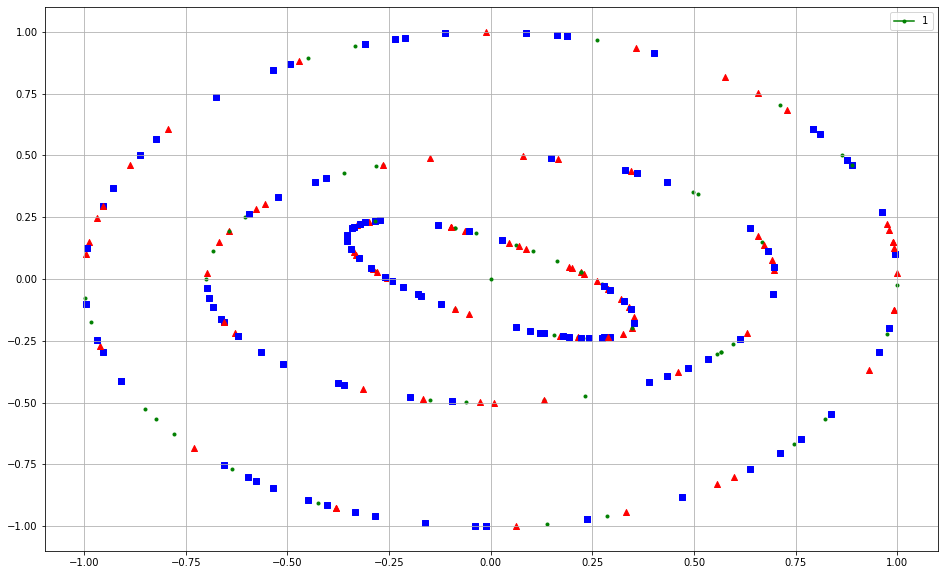

In [151]:
draw(train,test,valid)

In [152]:
model = Sequential()
model.add(Dense(20, input_shape=(2,), activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))

In [175]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile( loss='mse', optimizer=optimizer , metrics=[tf.keras.metrics.BinaryCrossentropy()])

In [99]:

y = pd.get_dummies(train['class'])


In [193]:
X = pd.concat([X_train, X_valid, X_test])
Y = pd.concat([y_train, y_valid, y_test])

,x,y
40,-0.354179,0.161411
4,-0.997159,-0.075327
43,-0.850994,-0.525175
19,0.137790,-0.990461
34,-0.061496,-0.498067
...,...,...
11,0.389813,-0.415298
40,-0.698011,-0.037663
0,-0.657114,-0.172321
107,-0.375079,-0.422164


In [176]:

history = model.fit(X_train, y_train, epochs=20, verbose=0, shuffle=False)

In [177]:
history.history

{'loss': [0.21444390714168549,
  0.20437996089458466,
  0.20299860835075378,
  0.2028452455997467,
  0.20317991077899933,
  0.20367997884750366,
  0.20416751503944397,
  0.20456039905548096,
  0.20483806729316711,
  0.20501242578029633,
  0.2051074504852295,
  0.2051481455564499,
  0.20515519380569458,
  0.2051437944173813,
  0.20512396097183228,
  0.2051018923521042,
  0.2050807923078537,
  0.20506204664707184,
  0.2050459384918213,
  0.20503224432468414],
 'binary_crossentropy': [0.6195561289787292,
  0.5958394408226013,
  0.5926266312599182,
  0.5922703742980957,
  0.5930479168891907,
  0.5942150950431824,
  0.595358669757843,
  0.5962846875190735,
  0.5969423055648804,
  0.5973573923110962,
  0.5975858569145203,
  0.5976857542991638,
  0.5977059602737427,
  0.5976822376251221,
  0.5976383686065674,
  0.5975889563560486,
  0.5975413918495178,
  0.5974992513656616,
  0.5974632501602173,
  0.5974327921867371]}

In [178]:
p = []




predict_x=model.predict((train.iloc[:, :-1]))
p.append(np.argmax(predict_x,axis=1))
#p.append(model.predict(train.iloc[:, :-1]))
accTrain = accuracy_score(train['class'], p[-1])
mseTrain = mean_squared_error(train['class'], p[-1])


predict_x=model.predict((test.iloc[:, :-1]))
p.append(np.argmax(predict_x,axis=1))
#p.append(model.predict(test.iloc[:, :-1]))
accTest = accuracy_score(test['class'], p[-1])
mseTest = mean_squared_error(test['class'], p[-1])


predict_x=model.predict((valid.iloc[:, :-1]))
p.append(np.argmax(predict_x,axis=1))
#p.append(model.predict(valid.iloc[:, :-1]))
accValid = accuracy_score(valid['class'], p[-1])
mseValid = mean_squared_error(valid['class'], p[-1])

In [179]:
p

[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
        1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
        1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
        1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
        1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]),
 array([1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 2]),
 array([2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2])]

In [180]:
print('Train accuracy = {}'.format(accTrain))
print(f'Train MSE = {mseTrain}')
print(f'Train RMSE = {np.sqrt(mseTrain)}\n')

print('Test accuracy = {}'.format(accTest))
print(f'Test MSE = {mseTest}')
print(f'Test RMSE = {np.sqrt(mseTest)}\n')

print('Valid accuracy = {}'.format(accValid))
print(f'Valid MSE = {mseValid}')
print(f'Valid RMSE = {np.sqrt(mseValid)}')

Train accuracy = 0.5153061224489796
Train MSE = 1.0204081632653061
Train RMSE = 1.0101525445522108

Test accuracy = 0.4642857142857143
Test MSE = 0.9642857142857143
Test RMSE = 0.9819805060619657

Valid accuracy = 0.5
Valid MSE = 0.9285714285714286
Valid RMSE = 0.9636241116594315


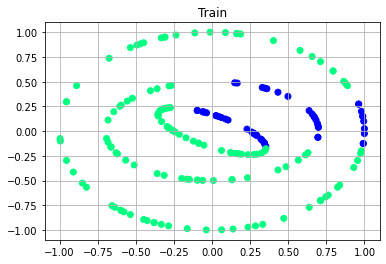

In [181]:
plt.scatter(train['x'], train['y'], c=p[0], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Train')
plt.show()

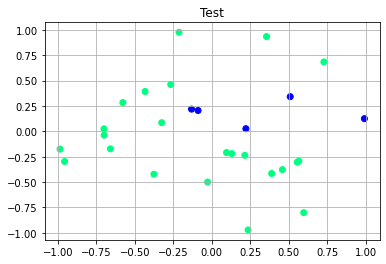

In [182]:
plt.scatter(test['x'], test['y'], c=p[1], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Test')
plt.show()

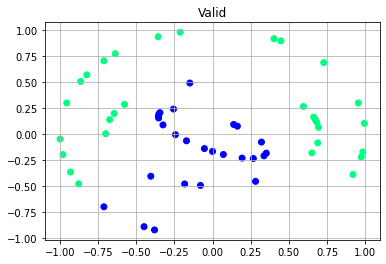

In [81]:
plt.scatter(valid['x'], valid['y'], c=p[2], cmap=plt.cm.winter)
plt.grid(True)
plt.title('Valid')
plt.show()

In [82]:
h = 0.025
x = np.arange(-1.2, 1.2 + h, h)
y = np.arange(-1.2, 1.2 + h, h)

In [83]:
predictions = [model.predict(np.array([[i, j]])).round(1) for i in x for j in y]

In [84]:
xx, yy = np.meshgrid(x, y)

In [89]:
colors = np.array(predictions).reshape((len(predictions), 3))
colors.shape

(9409, 3)

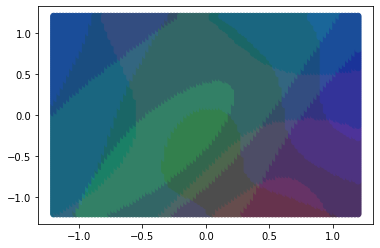

In [90]:
plt.scatter(yy, xx, c=colors, cmap=plt.cm.winter);
plt.show()